In [160]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

In [161]:
TRAIN_DIR = 'catdogdata/train/'
TEST_DIR = 'catdogdata/test/'
IMG_SIZE = 64
LR = 1e-3

In [162]:
def label_img(img):
    if 'dog' in img:
        return 1
    elif 'cat' in img:
        return 0
    
label_img('cat.0.jpg')

0

In [163]:
def create_train_data():
    filenames = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
    count = len(filenames)
    training_images = np.ndarray((count, 3, IMG_SIZE, IMG_SIZE), dtype=np.uint8)
    training_labels = []
    shuffle(filenames)
    for i in tqdm(range(count)):
        img = filenames[i]
        label = label_img(img)
        # Read image and turn it into grayscale
        img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
        # Resize images into IMG_SIZE x IMG_SIZE
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_images[i] = img.T
        training_labels.append(label)
    np.save('training_data', training_images)
    print('Saved training data')
    return training_images, np.array(training_labels)

In [ ]:
training_data, training_labels = create_train_data()

 35%|████████████▊                       | 4309/12159 [00:05<00:10, 778.09it/s]

In [152]:
print(training_data.shape)
print(training_data.ndim)

(12159, 3, 64, 64)
4


In [153]:
training_labels

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [154]:
# Generate labels


In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

[[[202 218 216 ...  53  61  51]
  [225 228 225 ...  69  65  71]
  [218 218 220 ...  54  63  60]
  ...
  [ 61 113 112 ... 154 153 150]
  [ 41 107 105 ... 157 164 149]
  [ 43 103  98 ... 167 165 159]]

 [[202 218 216 ...  53  61  51]
  [225 228 225 ...  69  65  71]
  [218 218 220 ...  54  63  60]
  ...
  [ 61 113 112 ... 154 153 150]
  [ 41 107 105 ... 157 164 149]
  [ 43 103  98 ... 167 165 159]]

 [[202 218 216 ...  53  61  51]
  [225 228 225 ...  69  65  71]
  [218 218 220 ...  54  63  60]
  ...
  [ 61 113 112 ... 154 153 150]
  [ 41 107 105 ... 157 164 149]
  [ 43 103  98 ... 167 165 159]]]


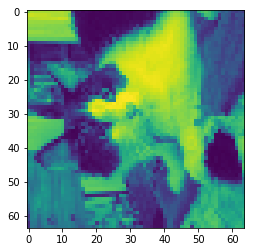

In [156]:
# First element is an image
# Second element is a label
print(training_data[0])
# Checking how an image looks like
plt.imshow(training_data[0][0])

In [157]:
# Build a neural network
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

In [158]:
def catdog_vgg16():
    objective = 'binary_crossentropy'
    optimizer = RMSprop(lr=1e-4)
    model = Sequential()
    model.add(Conv2D(32, 3, padding='same', input_shape=training_data.shape[1:], activation='relu'))
    model.add(Conv2D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    print("First layer...")
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(Conv2D(64, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    print("Second layer...")
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(Conv2D(128, 3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    print("Third layer...")
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    print("Compiling model...")
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

model = catdog_vgg16()

First layer...
Second layer...
Third layer...
Compiling model...


In [159]:
model.fit(training_data, training_labels, batch_size=32, nb_epoch=10, validation_split=0.25, verbose=2, shuffle=True)

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking target: expected activation_13 to have shape (1,) but got array with shape (2,)